# Signaux élémentaires

Différents signaux seront régulièrement utilisés dans le cours : ils sont définis ici.
La plupart peuvent être définis à temps continu ou à temps discret.

## Sinusoïde

En temps continu, la sinusoïde a pour expression :

$$
  x(t) = A \sin(2 \pi f t + \varphi)
$$

où :
* $A$ est l'_amplitude_
* $f$ est la _fréquence_
* $\varphi$ est le _déphasage_

Remarquez que :
* si $\varphi=0$, alors $x(t)$ est un sinus,
* si $\varphi=\pi/2$, alors $x(t)$ est un cosinus.

La sinusoïde en temps continu est une [fonction périodique](https://fr.wikipedia.org/wiki/Fonction_p%C3%A9riodique) de période $1/f$ ou, de manière équivalente, de fréquence $f$.

En temps discret, la sinusoïde a la même expression (par convention, on entoure la variable de temps par des crochets dans le cas d'un signal échantillonné) :

$$
  x[n] = A \sin(2 \pi f n + \varphi)
$$

Le sinus est créé en Python avec la fonction [`numpy.sin`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html).

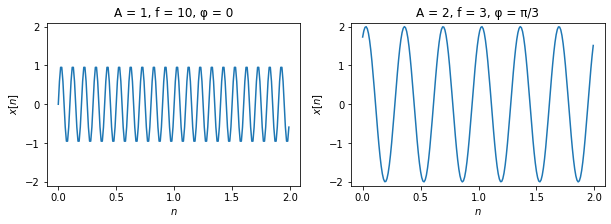

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 2, 0.01)
a1, f1, phi1 = 1, 10, 0
a2, f2, phi2 = 2, 3, math.pi/3
x1 = a1 * np.sin(2*math.pi*f1*n + phi1)
x2 = a2 * np.sin(2*math.pi*f2*n + phi2)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(n,x1)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title("A = 1, f = 10, φ = 0")
plt.ylim([-2.1, 2.1])
plt.subplot(1,2,2)
plt.plot(n,x2)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title("A = 2, f = 3, φ = π/3")
plt.ylim([-2.1, 2.1])
plt.show()

## Exponentielle complexe

En temps continu, l'exponentielle complexe a pour expression :

$$
  x(t) = \exp(j 2 \pi f t + \varphi)
       = \cos(2 \pi f t + \varphi) + j \sin(2 \pi f t + \varphi)
$$

En temps discret, c'est la même expression (en remplaçant les parenthèses dans $x(t)$ par des crochets). L'exponentielle est créée en Python avec la fonction [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html),
et le nombre complexe $j$ est obtenu avec `1j`.

À cause du nombre complexe $j$, le signal est à valeurs complexes. Pour le représenter, il faut être dans un espace à trois dimensions (la variable, la partie réelle et la partie imaginaire). De cette manière, l'exponetielle complexe ressemble à une queue de cochon, ou un tire-bouchon. Remarquez que la fréquence peut tout à fait être négative : dans ce cas, l'exponentielle complexe tourne dans le sens inverse.

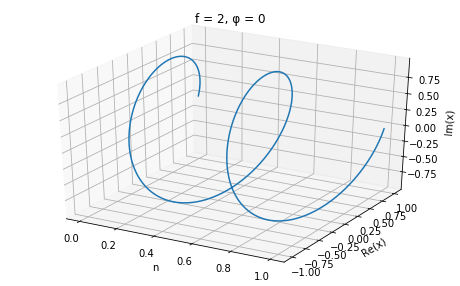

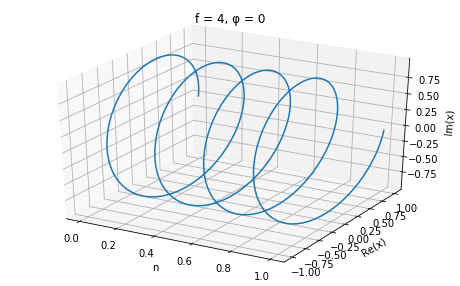

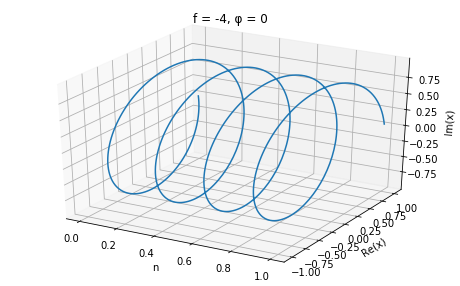

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

n = np.arange(0, 1, 0.002)

params = [[2, 0], [4, 0], [-4, 0]]

for f, phi in params:
    
    x = np.exp(1j*2*math.pi*f*n + phi)
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')
    ax.plot(n, np.real(x), np.imag(x))    
    ax.set_xlabel("n")
    ax.set_ylabel("Re(x)")
    ax.set_zlabel("Im(x)")
    plt.title(f"f = {f}, φ = {phi}")
    plt.show()

## Sinus cardinal

Le sinus cardinal, noté $\mathrm{sinc}$, a pour définition :

$$
  \mathrm{sinc}(t) =
  \begin{cases}
    \displaystyle \frac{\sin(\pi t)}{\pi t} &\text{si}\quad t \neq 0 \\
    1 &\text{si}\quad t = 0
  \end{cases}
$$

Un sinus cardinal ressemble à un cosinus donc l'amplitude décroît lorsqu'on s'éloigne de $t=0$.

Le cas où $t=0$ est à considérer à part puisque la division par $t=0$ n'est pas possible.
Encore une fois, le sinus cardinal à temps discret a la même expression (avec des crochets à la place des parenthèses).
Le sinus cardinal est obtenu en Python avec la fonction [`numpy.sinc`](https://numpy.org/doc/stable/reference/generated/numpy.sinc.html).


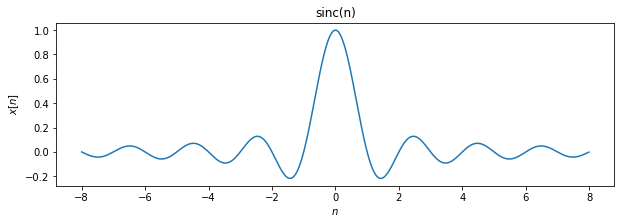

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-8, 8, 0.01)
x = np.sinc(n)

plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title("sinc(n)")
plt.show()

## Échelon

L'échelon a pour définition :

$$
  u(t) =
  \begin{cases}
    0 &\text{si}\quad t < 0 \\
    1 &\text{si}\quad t \geq 0
  \end{cases}
$$

L'échelon est donc nul pour $t<0$ et égal à un sinon.
Vous l'aurez compris, il existe aussi une version à temps discret.
Il est également appelé fonction de Heaviside.

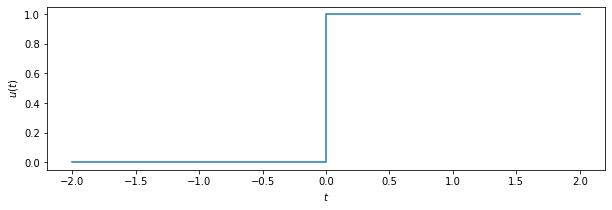

In [4]:
import matplotlib.pyplot as plt

n = [-2, 0, 0, 2]
x = [0, 0, 1, 1]

plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.show()

Il n'existe pas de fonction permettant de générer un échelon en Python : il faut passer par des instructions spécifiques, comme par exemple dans le code suivant :

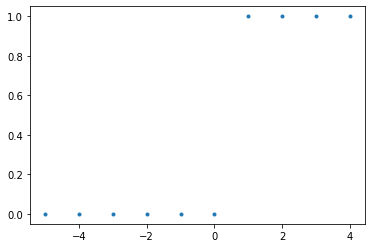

In [5]:
# Tout d'abord, générer la liste des instants d'échantillonnage
# Par exemple ici : 11 échantillons répartis entre -5 et 5
n = np.arange(-5, 5)

# L'échelon est obtenu avec la fonction numpy.where
# qui affecte la valeur 1 ou 0 suivant la condition
u = np.where(n>0, 1, 0)

# Affichage (les échantillons sont représentés par des points
# et ne sont pas reliés)
plt.plot(n, u, '.')
plt.show()

## Porte

La porte a pour définition :

$$
  \mathrm{rect}(t) =
  \begin{cases}
    0 &\text{si}\quad |t| > \frac{1}{2} \\
    1 &\text{si}\quad |t| \leq \frac{1}{2}
  \end{cases}
$$

La porte est également appelée fonction rectangle.

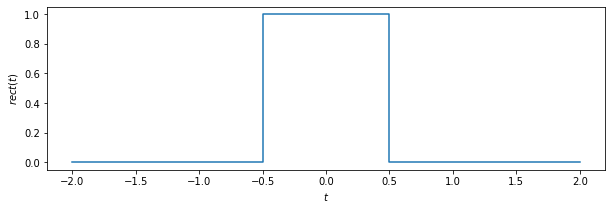

In [6]:
import matplotlib.pyplot as plt

n = [-2, -.5, -.5, .5, .5, 2]
x = [0, 0, 1, 1, 0, 0]

plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.xlabel("$t$")
plt.ylabel("$rect(t)$")
plt.show()

Comme pour l'échelon, la porte peut être définie en Python avec la fonction [`numpy.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) :

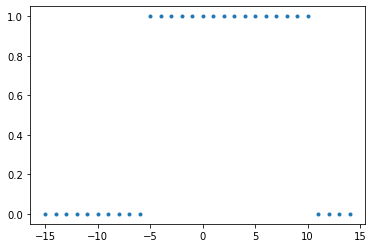

In [7]:
# Porte définie entre -5 et 10
n = np.arange(-15, 15)
r = np.where( (n>=-5) & (n<=10) , 1, 0)
plt.plot(n, r, '.')
plt.show()

## Impulsion de Dirac

L'impulsion de Dirac est telle que :

$$
  \delta(t) = 0 \;\text{si}\; t \neq 0
  \qquad\text{et}\qquad
  \int \delta(t) dt = 1
$$

L'impulsion de Dirac n'est pas une fonction, au sens mathématique, car $\delta(0)$ n'est pas défini : c'est en fait une distribution. Pour cette raison, on représente ce signal par une flèche, qui signifie que en 0, la valeur n'est pas définie.

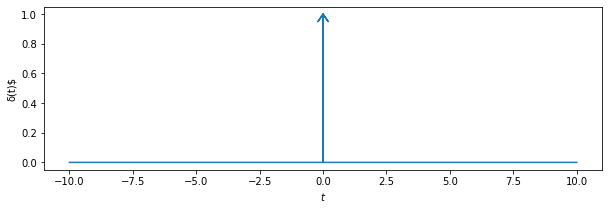

In [8]:
import matplotlib.pyplot as plt

x = .2
y = .95
n = [-10, 0, 0, -x, 0, x, 0, 0, 10]
d = [ 0, 0, 1,  y, 1, y, 1, 0,  0]

plt.figure(figsize=(10,3))
plt.plot(n,d)
plt.xlabel("$t$")
plt.ylabel("δ(t)$")
plt.show()

C'est un signal non représentable physiquement : il n'existe pas dans la nature, mais c'est une conceptualisation mathématique bien utile en traitement du signal. Un exemple réaliste qui s'en approcherait serait le son produit lorsqu'on tape d'un coup bref dans ses mains. On peut l'approcher par une porte dont la largeur tend vers 0 et l'amplitude vers l'infini.

L'impulsion de Dirac a des propriétés particulières, notamment :
* $f(t) \delta(t) = f(0) \delta(t)$
* $f(t) \delta(t-\tau) = f(\tau) \delta(t-\tau)$

À l'inverse des signaux précédent, l'impulsion de Dirac ne peut pas s'écrire en temps discret. Il existe cependant un signal qui s'en approche : l'impulsion discrète.

## Impulsion discrète

L'impulsion discrète est l'équivalent à temps discret de l'impulsion de Dirac. C'est une fonction mathématique classique car elle est définie en tout point :

$$
  \delta[n] =
  \begin{cases}
      0 \;\text{si}\; n \neq 0 \\
      1 \;\text{si}\; n = 0
  \end{cases}
$$

L'impulsion discrète est également appelée impulsion de Kronecker.

La fonction `numpy.where` peut encore être utilisée pour définir une impulsion discrète en Python :

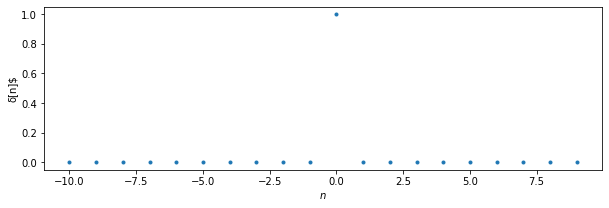

In [9]:
n = np.arange(-10, 10)
d = np.where(n==0, 1, 0)

plt.figure(figsize=(10,3))
plt.plot(n, d, '.')
plt.xlabel("$n$")
plt.ylabel("δ[n]$")
plt.show()

## Peigne de Dirac

Le peigne de Dirac est défini par :

$$
  Ш_T(t) = \sum_{k=-\infty}^{+\infty} \delta(t-kT)
$$

Le peigne de Dirac est également appelé train d'impulsion, fonction d'échantillonnage ou distribution Cha (en raison de sa ressemblance avec la lettre cyrillique Ш).

In [10]:
# import matplotlib.pyplot as plt

# # Flèche
# x = .2
# y = .95
# arrow_x = np.array([0, 0, -x, 0, x, 0, 0])
# arrow_y = np.array([0, 1,  y, 1, y, 1, 0])

# # Couleur
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
# clr = colors[0]

# # Affichage
# plt.figure(figsize=(10,3))
# plt.plot([-10, 10], [0, 0])
# for i in range(-9, 10, 3):
#     plt.plot(arrow_x+i, arrow_y, color=clr)
# plt.xlabel("$t$")
# plt.ylabel("Ш(t)$")
# plt.title("Peigne de période 3")
# plt.show()